# import packages

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Reading test and train data set

In [2]:
df = pd.read_csv('loan_train.csv')
test_df = pd.read_csv('loan_test.csv')

# Convert to date time object

In [3]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

# Preprocessing

In [4]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

In [5]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x > 3 ) else 0)

# Convert Categorical feature to numerical

In [6]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [7]:
df['loan_status'].replace(to_replace = ["PAIDOFF", "COLLECTION"], value = [0,1], inplace = True)
test_df['loan_status'].replace(to_replace = ["PAIDOFF", "COLLECTION"], value = [0,1], inplace = True)

# one hot encoding

In [8]:
train_feature = df[['Principal','terms','age','Gender','weekend']]
train_feature = pd.concat([train_feature,pd.get_dummies(df['education'])], axis=1)
train_feature.drop(['Master or Above'], axis = 1,inplace=True)
train_feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [9]:
test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature,pd.get_dummies(test_df['education'])], axis=1)
test_feature.drop(['Master or Above'], axis = 1,inplace=True)
test_feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


# Feature Selection

# For training

In [10]:
X = train_feature
y = df['loan_status'].values

# for testing

In [11]:
X_test = test_feature

In [12]:
y_test = test_df['loan_status'].values

# Normalize data

In [13]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [14]:
from sklearn.model_selection import train_test_split
knn_train_X, knn_test_X , knn_train_y, knn_test_y = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
k = 6
my_knn = KNeighborsClassifier(n_neighbors = k).fit(X,y)

## find best value for k

In [16]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(knn_train_X,knn_train_y)
    yhat=neigh.predict(knn_test_X)
    mean_acc[n-1] = metrics.accuracy_score(knn_test_y, yhat)

    
    std_acc[n-1]=np.std(yhat==knn_test_y)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67142857, 0.77142857, 0.71428571, 0.77142857, 0.75714286,
       0.78571429, 0.78571429, 0.77142857, 0.75714286])

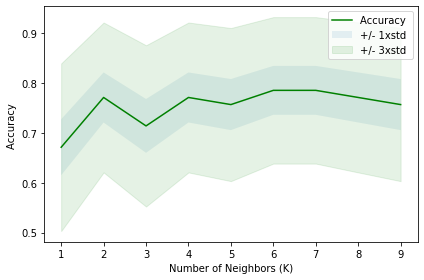

In [17]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [18]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7857142857142857 with k= 6


# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
my_tree = DecisionTreeClassifier(criterion = 'entropy').fit(X, y)

# Support Vector Machine

In [20]:
from sklearn.svm import SVC
my_svm = SVC(kernel = 'poly').fit(X,y)

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression( solver = 'lbfgs').fit(X, y)

# Model Evaluation using Test set

In [22]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## KNN Evaluation

In [23]:
knn_prediction = my_knn.predict(X_test)
knn_jaccard = jaccard_score(y_test, knn_prediction)
knn_f1 = f1_score(y_test, knn_prediction)
print('F1 score for knn:', knn_f1, '\nJaccard score for knn:', knn_jaccard)

F1 score for knn: 0.3157894736842105 
Jaccard score for knn: 0.1875


## Decision Tree evaluation

In [24]:
tree_prediction = my_tree.predict(X_test)
tree_jaccard = jaccard_score(y_test, tree_prediction)
tree_f1 = f1_score(y_test, tree_prediction)
print('F1 Score for decision tree:', tree_f1,'\nJaccard score for decision tree:', tree_jaccard )

F1 Score for decision tree: 0.4 
Jaccard score for decision tree: 0.25


## Support Vector Machine Evaluation

In [25]:
svm_prediction = my_svm.predict(X_test)
svm_jaccard = jaccard_score(y_test, svm_prediction)
svm_f1 = f1_score(y_test, svm_prediction)
print('F1 score for svm:', svm_f1,'\nJaccard score for svm:', svm_jaccard)

F1 score for svm: 0.22222222222222224 
Jaccard score for svm: 0.125


## Logistic Regression Evaluation

In [26]:
lr_prediction = my_lr.predict(X_test)
lr_jaccard = jaccard_score(y_test, lr_prediction)
lr_f1 = f1_score(y_test, lr_prediction)
pred_prob = my_lr.predict_proba(X_test)
lr_logloss = log_loss(y_test, pred_prob)

In [27]:
print('Logistic Regression Jaccard score:', lr_jaccard, '\nLogistic Regression f1:', lr_f1)
print('Logistic Regression Log loss:', lr_logloss)

Logistic Regression Jaccard score: 0.07142857142857142 
Logistic Regression f1: 0.13333333333333333
Logistic Regression Log loss: 0.4808081643472632


# REPORT

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                |0.19     | 0.32     | NA      |
| Decision Tree      |0.25     | 0.4      | NA      |
| SVM                |0.12     | 0.22     | NA      |
| LogisticRegression |0.07     |0.13      |0.48     |